<div>
<a href="http://www.music-processing.de/"><img style="float:left;" src="../data/FMP_Teaser_Cover.png" width=40% alt="FMP"></a>
<a href="https://www.audiolabs-erlangen.de"><img src="../data/Logo_AudioLabs_Long.png" width=59% style="float: right;" alt="AudioLabs"></a>
</div>

<div>
<a href="../C7/C7.html"><img src="../data/C7_nav.png" width="100"  style="float:right;" alt="C7"></a>
<h1>Evaluation Measures</h1> 
</div>

<br/>

<p>
Following Section 7.3.3 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>, we discuss some evaluation metrics that are useful for <strong>document-level retrieval scenarios</strong>. This continues our discussion of <a href="../C4/C4S5_Evaluation.html">general evaluation metrics</a> from Section 4.5. A comprehensive Python library that provides implementations for measures to evaluate Music Information Retrieval (MIR) systems is provided by the <code>mir_eval</code> toolbox:    

<ul>
<li><span style="color:black">
Colin Raffel, Brian McFee, Eric J. Humphrey, Justin Salamon, Oriol Nieto, Dawen Liang, Daniel P. W. Ellis:<strong> MIR_EVAL: A Transparent Implementation of Common MIR Metrics.</strong> Proceedings of the International Society for Music Information Retrieval Conference (ISMIR), Taipei, Taiwan, 2014, pp. 367&ndash;372.
<br>
    <a href="https://craffel.github.io/mir_eval/">Documentation</a>
<br>    
<a type="button" class="btn btn-default btn-xs" target="_blank" href="../data/bibtex/FMP_bibtex_RaffelMHSNLE14_MIReval_ISMIR.txt"> Bibtex </a>
</span></li>
</ul>     
</p> 

## Document-Level Retrieval

In a **document-level** retrieval scenario such as [version identification](../C7/C7S3_VersionIdentification.html) the objective is to retrieve entire documents rather than fragments (even though the document-level similarity score may be based on a [local match of common subsequences](../C7/C7S3_CommonSubsequence.html)). We start by giving a mathematical description of this retrieval scenario. In the following, we assume that the database consists of a set of $K$ documents, 

\begin{equation}
    \{\mathcal{D}_1,\mathcal{D}_2,\ldots,\mathcal{D}_K\},
\end{equation}

where each document $\mathcal{D}_k$ is associated to an identifier $k\in[1:K]$. Furthermore, given a query document $\mathcal{Q}$, we suppose that we have a similarity measure that yields a value $\gamma(\mathcal{Q},\mathcal{D}_k)\in\mathbb{R}$ for each $k\in[1:K]$. For example, such a measure was introduced at the end of the [FMP notebook on version identification](../C7/C7S3_VersionIdentification.html). Based on these values, we can **rank** (i.e., sort) the database documents in descending order of their similarity values (imagining a Google-like retrieval scenario). In this way, the retrieval results that are most similar to the given query appear early in the result list displayed to a user. The **top rank** is the retrieval result that is ranked at the first position (i.e., the document with the highest similarity value). Furthermore, we say that the document $\mathcal{D}_k$ has a **higher rank** than the document $\mathcal{D}_\ell$ if 

\begin{equation}
          \gamma(\mathcal{Q},\mathcal{D}_k)>\gamma(\mathcal{Q},\mathcal{D}_\ell)
\end{equation}

for $k,\ell \in[1:K]$. To break a tie in the case $\gamma(\mathcal{Q},\mathcal{D}_k)=\gamma(\mathcal{Q},\mathcal{D}_\ell)$, we simply say that $\mathcal{D}_k$ has a higher rank than $\mathcal{D}_\ell$ if $k<\ell$. Mathematically, a ranking can be specified by a permutation

\begin{equation}
          \rho_\mathcal{Q}:[1:K]\to[1:K]
\end{equation}

that sorts the database documents in descending order of rank:

\begin{equation}
\label{eq:AudioRetr:VI:EvMe:rankPermOrder}
          \gamma(\mathcal{Q},\mathcal{D}_{\rho_\mathcal{Q}(1)}) \geq
          \gamma(\mathcal{Q},\mathcal{D}_{\rho_\mathcal{Q}(2)}) \geq
          \ldots \geq
          \gamma(\mathcal{Q},\mathcal{D}_{\rho_\mathcal{Q}(K)}).
\end{equation}

Note that, using this notation, the top rank (highest rank) is represented by the index value $1$ (corresponding to the document with identifier $\rho_\mathcal{Q}(1)$) and the lowest rank by the index value $K$ (corresponding to the document with identifier $\rho_\mathcal{Q}(K)$). 

Depending on the application in mind, one can think of many different ways for presenting the final retrieval result and assessing its quality. In certain applications, only the top-ranked match may be of interest, and will be further processed by the retrieval system. For example, in [audio identification](../C7/C7S1_AudioIdentification.html), only the top match is needed to identify the audio recording and to retrieve suitable metadata, which is then presented to the user. In other scenarios, the system may show the top ten matches, a typical standard setting as used in web-search systems such as Google. When looking only at the similarity values, the top matches may include just documents that are nearly identical to the query document. Therefore, some retrieval systems try to find a good balance between document similarity, relevance, and diversity when presenting retrieval results to the user.

## Relevance Function

The design and evaluation of retrieval systems constitute a separate area of research. In the following, we introduce the main ideas of some general evaluation measures based on [precision and recall](../C4/C4S5_Evaluation.html) (see Section 4.5.1 of <a href="http://www.music-processing.de/">[Müller, FMP, Springer 2015]</a>). Let $\mathcal{I}:=[1:K]$ be the set of **items**, which are identifiers of the database documents in our current scenario. For the evaluation, we assume that a reference annotation of the **relevant** (or **positive**) items is available. Let

\begin{equation}
   \mathcal{I}_\mathcal{Q}:=\mathcal{I}^\mathrm{Ref}_+\subseteq \mathcal{I}
\end{equation}

be the set of the relevant items, which depends on the given query document $\mathcal{Q}$. In our scenario, the retrieval system returns an ordered list of documents. One possibility for evaluating ranked retrieval results is to consider an entire family of precision and recall values depending on the ranking parameter $r\in[1:K]$. For later convenience, we define a **relevance function** 

$$
\chi_\mathcal{Q}:[1:K]\to\{0,1\}
$$ 

that assumes the value $1$ if the document at rank $r$ is relevant; otherwise it assumes the value $0$. Mathematically, this definition is expressed by 

$$
   \chi_\mathcal{Q}(r):=
    \left\{\begin{array}{ll}
    1 &\mbox{if}\quad \rho_\mathcal{Q}(r) \in \mathcal{I}_\mathcal{Q},\\
    0 &\mbox{if}\quad \rho_\mathcal{Q}(r) \in \mathcal{I} \setminus \mathcal{I}_\mathcal{Q}.
    \end{array}\right. 
$$

## Precision&ndash;Recall (PR) Curve

We then define the precision $\mathrm{P}_\mathcal{Q}(r)$ and recall $\mathrm{R}_\mathcal{Q}(r)$ at rank $r\in[1:K]$
by setting

\begin{eqnarray}
  \mathrm{P}_\mathcal{Q}(r) &:=& \frac{1}{r} \,\,\sum_{k=1}^r  \chi_\mathcal{Q}(k),\\
  \mathrm{R}_\mathcal{Q}(r) &:=& \frac{1}{|\mathcal{I}_\mathcal{Q}|} \,\,\sum_{k=1}^r  \chi_\mathcal{Q}(k). 
\end{eqnarray}

The family $\{(\mathrm{P}_\mathcal{Q}(r),\mathrm{R}_\mathcal{Q}(r)) \mid r\in[1:K] \}$ can be visualized in a two-dimensional plane with one axis referring to precision and the other to recall. Combining subsequent points yields a so-called **precision&ndash;recall curve** or **PR curve**. 

## Toy Example

To illustrate the definitions, we consider a toy example with documents indexed by the set $\mathcal{I}:=[1:K]$ and $K=10$. For a given query $\mathcal{Q}$, we assume that the set of relevant items is $\mathcal{I}_\mathcal{Q}=\{2,7,8,9\}$.

* In the first table, we indicate the document identifier and the similarity scores $\gamma(\mathcal{Q},\mathcal{D}_k)\in\mathbb{R}$ for $k\in[1:K]$. From this, one can derive the rank $\rho_\mathcal{Q}(k)\in[1:K]$ for each document.
* In the second table, where the documents are sorted according to their rank, we indicate the rank, the document identifier, and the relevance of the document. From this, one can compute the precision values $\mathrm{P}_\mathcal{Q}(r)$ and recall values $\mathrm{R}_\mathcal{Q}(r)$ at rank $r\in[1:K]$ as shown in the last two columns.
* Finally, the plot shows the resulting PR curve. The break-even point, which we will introduce later, is indicated by the green circle.

<img src="../data/C7/FMP_C7_F21.png" width="600px" align="middle" alt="FMP_C7_F21.png">

Note that, in this example, the relevant items occur at the rank positions $r\in\{1,2,4,8\}$. For example, the top three matches contain two of the four relevant documents, which yields $\mathrm{P}_\mathcal{Q}(3)=2/3$ and $\mathrm{R}_\mathcal{Q}(3)=2/4$. In general, a PR curve has a characteristic sawtooth shape: if the $r^\mathrm{th}$ document is relevant, both the precision and the recall increase. If it is nonrelevant, the precision drops while the recall remains the same. Furthermore, a value $\mathrm{P}_\mathcal{Q}(r)=1$ means that all of the top $r$ matches are relevant. 

## Implementation

In the following code cell, we provide an implementation of the relevance function, the PR curve, and further metrics introduced below. The implementation is tested on our toy example.

<div class="alert alert-block alert-warning">
<strong>Note:</strong> The precision <code>P_Q</code>, recall <code>R_Q</code>, F-measure <code>F_Q</code>, relevance function <code>X_Q</code>, as well as <code>I_sorted</code> and <code>rank_sorted</code> are encoded as array. In theory, these arrays are indexed by the rank $r\in[1:K]$. In the implementation, however, since Python indexing starts with the index 0, these arrays are indexed by $i\in[0:K-1]$. The rank is given as <code>rank_sorted[i]</code> (which is <code>i+1</code>).
</div>

ID,Score,Rank
1,8,10
2,52,2
3,22,5
4,10,9
5,12,7
6,34,3
7,11,8
8,27,4
9,72,1
10,18,6

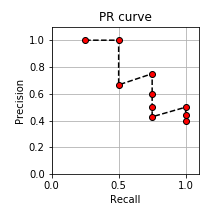

In [1]:
import sys
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

sys.path.append('..')
from LibFMP.B import FloatingBox

def plot_PR_curve(P_Q, R_Q, figsize=(3, 3)):
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    plt.plot(R_Q, P_Q, linestyle='--', marker='o', color='k', mfc='r')
    plt.xlim([0, 1.1])
    plt.ylim([0, 1.1])
    ax.set_aspect('equal', 'box')
    plt.title('PR curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid()
    plt.tight_layout()
    return fig, ax
    
# Set up data
I = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
score = np.array([8, 52, 22, 10, 12, 34, 11, 27, 72, 18])
I_Q = np.array([2, 7, 8, 9])

# Compute rank and sort documents according to rank 
K = len(I)
index_sorted = np.flip(np.argsort(score))
I_sorted = I[index_sorted]
rank = np.argsort(index_sorted) + 1 
rank_sorted =  np.arange(1, K+1)

# Compute relevance function X_Q (indexing starts with zero)
X_Q = np.zeros(K, dtype=bool)
for i in range(K):
    if I_sorted[i] in I_Q:
        X_Q[i] = True

# Compute precision and recall values (indexing starts with zero)
M = len(I_Q)
P_Q = np.zeros(K)
R_Q = np.zeros(K)
for i in range(K):
    r = rank_sorted[i]
    P_Q[i] = np.sum(X_Q[:r]) / r
    R_Q[i] = np.sum(X_Q[:r]) / M

# Arrange output as tables
df1 = pd.DataFrame({'ID': I, 'Score': score, 'Rank': rank})
df2 = pd.DataFrame({'Rank': rank_sorted, 'ID': I_sorted, 
                    '$\chi_\mathcal{Q}$': X_Q, 
                    'P(r)': P_Q, 
                    'R(r)': R_Q})
fig, ax = plot_PR_curve(P_Q, R_Q)

# Visualize tables and figure in floating box
layout = FloatingBox()
layout.add_html(df1.to_html(index=False))
layout.add_html(df2.to_html(index=False, float_format='%.2f'))
layout.add_fig(fig)
layout.show()

## Characteristic Points of PR Curve

For a certain query, the PR curve gives a good impression of the overall quality of the ranked retrieval result.  However, dealing with an entire family of precision and recall values can be quite cumbersome. Therefore, one often reduces this family of PR values to a single evaluation measure that still bears some characteristic information on the overall retrieval performance. One such measure is the **break-even point** of the PR curve, which is defined to be the positive value where the precision equals the recall. In the above example, the break-even point is $\mathrm{P}_\mathcal{Q}(4)=\mathrm{R}_\mathcal{Q}(4)=0.75$. It is not hard to see that the break-even point exists if and only if there is at least one relevant document among the top $|\mathcal{I}_\mathcal{Q}|$ items of the ranked list. Furthermore, in this case the break even point correspond to the precision (or recall) at rank $r=|\mathcal{I}_\mathcal{Q}|$:

\begin{equation}
\mathrm{P}_\mathcal{Q}(|\mathcal{I}_\mathcal{Q}|) = \mathrm{R}_\mathcal{Q}(|\mathcal{I}_\mathcal{Q}|)
\end{equation}

As another measure, one may consider the F-measure values corresponding to the precision and recall values of the PR curve. To this end, let 

\begin{equation}
    \mathrm{F}_\mathcal{Q}(r) = 
    2\cdot \frac{\mathrm{P}_\mathcal{Q}(r)\cdot \mathrm{R}_\mathcal{Q}(r)}{\mathrm{P}_\mathcal{Q}(r) + \mathrm{R}_\mathcal{Q}(r)}
\end{equation}

be the F-measure of $\mathrm{P}_\mathcal{Q}(r)$ and $\mathrm{R}_\mathcal{Q}(r)$. In the case that $\mathrm{P}_\mathcal{Q}(r)=0$ and $\mathrm{R}_\mathcal{Q}(r)=0$, we set $\mathrm{F}_\mathcal{Q}(r)=0$. Then, the **maximal F-measure** of the 
PR curve is defined as

\begin{equation}
   \mathrm{F}_\mathcal{Q}^\mathrm{max} := \max_{r\in[1:K]} \mathrm{F}_\mathcal{Q}(r).
\end{equation}

In the above example, the maximal F-measure is $\mathrm{F}_\mathcal{Q}^\mathrm{max}=0.75$ and equals the break-even point. In general, however, the two measures do not need to agree.

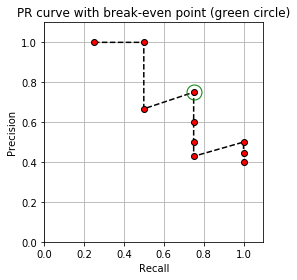

Break-even point = 0.75
F_Q =  [0.4  0.67 0.57 0.75 0.67 0.6  0.55 0.67 0.62 0.57]
F_max = 0.75


In [2]:
# Break-even point
BEP = P_Q[M-1]
# Maximal F-measure
sum_PR = P_Q + R_Q
sum_PR[sum_PR==0] = 1 # Avoid division by zero
F_Q = 2 * (P_Q * R_Q) / sum_PR
F_max = F_Q.max()

# Figure
fig, ax = plot_PR_curve(P_Q, R_Q, figsize=(4, 4))
ax.plot(BEP, BEP, color='green', marker='o', fillstyle='none', markersize=15)
ax.set_title('PR curve with break-even point (green circle)')
plt.show()

print('Break-even point = %.2f' % BEP)
print('F_Q = ', np.round(F_Q, 2))
print('F_max = %.2f' % F_max)

## Average Precision

We now consider an evaluation measure that looks at precision values at certain rank positions and averages the result. Formally, the **average precision** $\overline{\mathrm{P}}_\mathcal{Q}$ is defined by

\begin{equation}
   \overline{\mathrm{P}}_\mathcal{Q}:= \frac{1}{|\mathcal{I}_\mathcal{Q}|} \sum_{r=1}^K  \mathrm{P}_\mathcal{Q}(r)\chi_\mathcal{Q}(r).
\end{equation}

In this definition, the precision $\mathrm{P}_\mathcal{Q}(r)$ is only considered when $\chi_\mathcal{Q}(r)=1$. In other words, the average is computed only at the ranks where the recall level changes. For example, for the retrieval result above, one obtains an average precision of 

$$
   \overline{\mathrm{P}}_\mathcal{Q} = \frac{1}{4} (1 + 1 + 0.75 + 0.5) = 0.8125.
$$

As for the break-even point and the maximal F-measure, the average precision ranges between zero and one, where the value one is assumed if and only if all relevant documents are ranked at the top. One advantage of the average precision is that it takes into account the entire ranked list, contrary to the other two measures. For example, interchanging the values $\chi_\mathcal{Q}(8)$ and $\chi_\mathcal{Q}(9)$ in the above example (thus ranking a relevant document one position lower) leaves the break-even point and the maximal F-measure unchanged, whereas the average precision decreases to $\bar{\mathrm{P}}_\mathcal{Q} = (1 + 1 + 0.75 + 0.44)/4 = 0.7975$.

In [3]:
P_average = np.sum(P_Q * X_Q) / len(I_Q)
print('Average precision =', P_average)

Average precision = 0.8125


## Mean Average Precision

So far, we have considered evaluation measures for a single query document $\mathcal{Q}$. In practice, when evaluating the performance of a retrieval system, one should use many different queries that reflect the typical information a user needs within a given application scenario. To obtain a single evaluation number, one often combines the query-dependent values by taking the mean over all these values. As an example, let us consider the case of average precision. Let $\{\mathcal{Q}_1,\ldots,\mathcal{Q}_J\}$ be the set of query documents to be considered in the evaluation. Then we obtain a value $\overline{\mathrm{P}}_{\mathcal{Q}_j}$ for each $j\in[1:J]$. The **mean average precision** or **MAP** is defined by 

$$
   \overline{\mathrm{P}} := \frac{1}{J} \sum_{j=1}^J \overline{\mathrm{P}}_{\mathcal{Q}_j}.
$$

Having good discrimination and stability properties, the mean average precision is widely employed in information retrieval for different multimedia domains including text, image, audio, and music. In particular, the MAP has been used as a standard measure for evaluating the performance of version identification systems. 

## Implementation

One can make use of [NumPy functions](https://docs.scipy.org/doc/numpy/reference/) to implement the various evaluation measures in a more efficient way. For example, one can employ the functions [`np.isin`](https://numpy.org/doc/stable/reference/generated/numpy.isin.html) and [`np.cumsum`](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)
to avoid explicit loops. Using such NumPy functions, we provide in the next code cell the function `compute_PRF_metrics` that computes all evaluation metrics introduced above. 

In [4]:
def compute_PRF_metrics(I, score, I_Q):
    """Compute precision, recall, F-measures and other
    evaluation metrics for document-level retrieval

    Notebook: C7/C7S3_Evaluation.ipynb

    Args:
        I: Array of items
        score: Array containig the score values of the times
        I_Q: Array of relevant (positive) items

    Returns:
        P_Q, R_Q, F_Q: Precision, recall, and F-measures sorted by rank
        BEP: Break-even point
        F_max: Maximal F-measure
        P_average: Mean average
        X_Q: Relevance function
        rank: Array of rank values
        I_sorted: Array of items sorted by rank
        rank_sorted: Array of rank values sorted by rank
    """
    # Compute rank and sort documents according to rank
    K = len(I)
    index_sorted = np.flip(np.argsort(score))
    I_sorted = I[index_sorted]
    rank = np.argsort(index_sorted) + 1
    rank_sorted = np.arange(1, K+1)

    # Compute relevance function X_Q (indexing starts with zero)
    # X_Q = np.zeros(K, dtype=bool)
    # for i in range(K):
    #     if I_sorted[i] in I_Q:
    #         X_Q[i] = True
    X_Q = np.isin(I_sorted, I_Q)
    # P_Q = np.cumsum(X_Q) / np.arange(1, K+1)

    # Compute precision and recall values (indexing starts with zero)
    M = len(I_Q)
    # P_Q = np.zeros(K)
    # R_Q = np.zeros(K)
    # for i in range(K):
    #     r = rank_sorted[i]
    #     P_Q[i] = np.sum(X_Q[:r]) / r
    #     R_Q[i] = np.sum(X_Q[:r]) / M
    P_Q = np.cumsum(X_Q) / np.arange(1, K+1)
    R_Q = np.cumsum(X_Q) / M

    break_even_point = P_Q[len(I_Q)-1]

    # Break-even point
    BEP = P_Q[M-1]
    # Maximal F-measure
    sum_PR = P_Q + R_Q
    sum_PR[sum_PR == 0] = 1  # Avoid division by zero
    F_Q = 2 * (P_Q * R_Q) / sum_PR
    F_max = F_Q.max()
    # Average precision
    P_average = np.sum(P_Q * X_Q) / len(I_Q)

    return P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted

## Toy Example (Exercise 7.12)

As another toy example, we consider Exercise 7.12 of [Müller, FMP, Springer 2015](http://www.music-processing.de/), where the database $\{\mathcal{D}_1,\mathcal{D}_2,\ldots,\mathcal{D}_K\}$  consisting of $K=8$ documents. Given a query document $\mathcal{Q}$, the similarity values $\gamma(\mathcal{Q},\mathcal{D})\in\mathbb{R}$ are given by 

<img src="../data/C7/FMP_C7_E12_score.png" width="450px" align="middle" alt="C3">



Furthermore, let $\mathcal{I}_\mathcal{Q}=\{2,3,4,8\}$ be the set of the relevant items. In the following code cell, we compute all evaluation metrics as introduced in this notebook.

Rank,ID,Score,$\chi_\mathcal{Q}$,P(r),R(r),F(r)
1,6,3.70,False,0.00,0.00,0.00
2,3,3.60,True,0.50,0.25,0.33
3,4,3.50,True,0.67,0.50,0.57
4,5,3.20,False,0.50,0.50,0.50
5,8,3.10,True,0.60,0.75,0.67
6,2,2.60,True,0.67,1.00,0.80
7,7,1.50,False,0.57,1.00,0.73
8,1,0.70,False,0.50,1.00,0.67

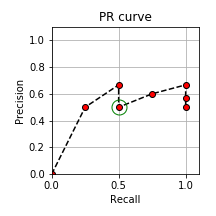

Break-even point = 0.50
F_max = 0.80
Average precision = 0.60833


In [5]:
I = np.array([1, 2, 3, 4, 5, 6, 7, 8])
score = np.array([0.7, 2.6, 3.6, 3.5, 3.2, 3.7, 1.5, 3.1])
I_Q = np.array([2, 3, 4, 8])

output = compute_PRF_metrics(I, score, I_Q)
P_Q, R_Q, F_Q, BEP, F_max, P_average, X_Q, rank, I_sorted, rank_sorted = output

# Arrange output as tables
score_sorted = np.flip(np.sort(score))
df = pd.DataFrame({'Rank': rank_sorted, 'ID': I_sorted,
                   'Score': score_sorted,
                   '$\chi_\mathcal{Q}$': X_Q, 
                   'P(r)': P_Q, 
                   'R(r)': R_Q,
                   'F(r)': F_Q})
fig, ax = plot_PR_curve(P_Q, R_Q, figsize=(3,3))
ax.plot(BEP, BEP, color='green', marker='o', fillstyle='none', markersize=15)
ax.set_title('PR curve')

# Visualize tables and figure in floating box
layout = FloatingBox()
layout.add_html(df.to_html(index=False, float_format='%.2f'))
layout.add_fig(fig)
layout.show()

print('Break-even point = %.2f' % BEP)
print('F_max = %.2f' % F_max)
print('Average precision =', np.round(P_average, 5))

<div class="alert" style="background-color:#F5F5F5; border-color:#C8C8C8">
<strong>Acknowledgment:</strong> This notebook was created by <a href="https://www.audiolabs-erlangen.de/fau/professor/mueller">Meinard Müller</a> and <a href="https://www.audiolabs-erlangen.de/fau/assistant/zalkow">Frank Zalkow</a>.
</div> 

<table style="border:none">
<tr style="border:none">
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C0/C0.html"><img src="../data/C0_nav.png" style="height:50px" alt="C0"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C1/C1.html"><img src="../data/C1_nav.png" style="height:50px" alt="C1"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C2/C2.html"><img src="../data/C2_nav.png" style="height:50px" alt="C2"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C3/C3.html"><img src="../data/C3_nav.png" style="height:50px" alt="C3"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C4/C4.html"><img src="../data/C4_nav.png" style="height:50px" alt="C4"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C5/C5.html"><img src="../data/C5_nav.png" style="height:50px" alt="C5"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C6/C6.html"><img src="../data/C6_nav.png" style="height:50px" alt="C6"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C7/C7.html"><img src="../data/C7_nav.png" style="height:50px" alt="C7"></a></td>
    <td style="min-width:50px; border:none" bgcolor="white"><a href="../C8/C8.html"><img src="../data/C8_nav.png" style="height:50px" alt="C8"></a></td>
</tr>
</table>